## Coinbase API Integration

In [1]:
# Data Extraction

import pandas as pd
import json
import requests
import hmac
import hashlib
import time
import cbpro
import pickle
    
from requests.auth import AuthBase

# --------------------------------------------------------------

# Data Cleaning/Vis

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# --------------------------------------------------------------

# Modeling

from lazypredict.Supervised import LazyRegressor

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.insert(0, 'src/')
from api_pull import *

### Public

In [2]:
public_client = cbpro.PublicClient()

In [3]:
coins = pd.DataFrame(public_client.get_products())

In [4]:
coins.head()

,id,base_currency,quote_currency,base_min_size,base_max_size,quote_increment,base_increment,display_name,min_market_funds,max_market_funds,margin_enabled,fx_stablecoin,max_slippage_percentage,post_only,limit_only,cancel_only,trading_disabled,status,status_message,auction_mode
0,LINK-BTC,LINK,BTC,0.03,6500,0.00000001,0.01,LINK/BTC,0.000021,6.0,False,False,0.10000000,False,False,False,False,online,,False
1,YFI-BTC,YFI,BTC,0.000029,4.2,0.00001,0.000001,YFI/BTC,0.00002,6.0,False,False,0.10000000,False,False,False,False,online,,False
2,BCH-EUR,BCH,EUR,0.0016,400,0.01,0.00000001,BCH/EUR,0.84,200000,False,False,0.10000000,False,False,False,False,online,,False
3,LINK-EUR,LINK,EUR,0.03,90000,0.00001,0.01,LINK/EUR,0.84,200000,False,False,0.10000000,False,False,False,False,online,,False
4,FORTH-EUR,FORTH,EUR,0.066,7200,0.001,0.001,FORTH/EUR,0.84,100000,False,False,0.10000000,False,False,False,False,online,,False


In [5]:
coins.sort_values('id', inplace=True)

In [6]:
public_client.get_product_order_book('BTC-USD')

{'bids': [['61505.05', '1.325781', 1]],
 'asks': [['61505.06', '0.1560013', 2]],
 'sequence': 30284147571,
 'auction_mode': False,
 'auction': None}

In [7]:
public_client.get_product_ticker('BTC-USD')

{'trade_id': 223117149,
 'price': '61508.51',
 'size': '0.02488772',
 'time': '2021-10-18T19:10:01.657185Z',
 'bid': '61508.5',
 'ask': '61508.51',
 'volume': '19726.76700684'}

In [8]:
public_client.get_product_24hr_stats('BTC-USD')

{'open': '60511.96',
 'high': '62675.19',
 'low': '58943.83',
 'volume': '19726.76700684',
 'last': '61549.66',
 'volume_30day': '434284.6253595'}

In [9]:
# save_all_historic_coin_data(coins)

In [10]:
history = load_history('BTC-USD')
history.head()

,time,low,high,open,close,volume
0,1634431200,60728.30,60772.23,60772.22,60764.23,3.60
1,1634431140,60738.78,60792.64,60743.90,60772.22,3.68
2,1634431080,60703.51,60765.99,60749.37,60748.13,6.70
3,1634431020,60666.07,60762.93,60732.82,60751.39,7.33
4,1634430960,60634.85,60769.22,60679.68,60717.02,9.31


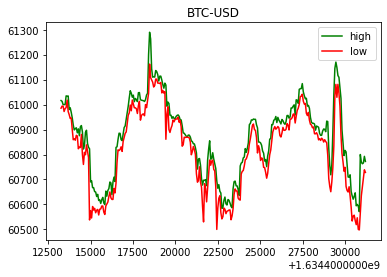

In [11]:
plot_coin_over_time('BTC-USD')

### Private

In [12]:
# Before implementation, set environmental variables with the names API_KEY and API_SECRET
API_KEY = get_keys('/Users/kyledufrane/.secret/cbpro_key.json')
API_SECRET = get_keys('/Users/kyledufrane/.secret/cbpro_secret.json')
API_PASSPHRASE = get_keys('/Users/kyledufrane/.secret/cbpro_passphrase.json')

In [13]:
auth_client = cbpro.AuthenticatedClient(API_KEY['key'], 
                                        API_SECRET['secret'],
                                        API_PASSPHRASE['passphrase'])

In [14]:
auth_client.get_accounts()

[{'id': '3afaa6c3-e28a-4f37-9148-644149bedad2',
  'currency': '1INCH',
  'balance': '0.0000000000000000',
  'hold': '0.0000000000000000',
  'available': '0',
  'profile_id': 'e53bcc9b-e226-40e1-90fd-074fdba0273b',
  'trading_enabled': True},
 {'id': 'de550a43-d040-4f6a-ae16-308a4b8f88b7',
  'currency': 'AAVE',
  'balance': '0.0000000000000000',
  'hold': '0.0000000000000000',
  'available': '0',
  'profile_id': 'e53bcc9b-e226-40e1-90fd-074fdba0273b',
  'trading_enabled': True},
 {'id': 'c9455562-a715-4025-9b58-8762adca2f59',
  'currency': 'ACH',
  'balance': '0.0000000000000000',
  'hold': '0.0000000000000000',
  'available': '0',
  'profile_id': 'e53bcc9b-e226-40e1-90fd-074fdba0273b',
  'trading_enabled': True},
 {'id': 'c76f423f-43d8-4b19-a31f-daf20a1de212',
  'currency': 'ADA',
  'balance': '0.0000000000000000',
  'hold': '0.0000000000000000',
  'available': '0',
  'profile_id': 'e53bcc9b-e226-40e1-90fd-074fdba0273b',
  'trading_enabled': True},
 {'id': 'c63769a9-6032-4dcf-8166-b6aa

### Modeling

In [ ]:
model_results, coins_models = get_models(coins)

 63%|███████████████████████████                | 27/43 [00:00<00:00, 41.68it/s]